In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from neurophotonics.sim import *

Connecting dimitri@localhost:3306


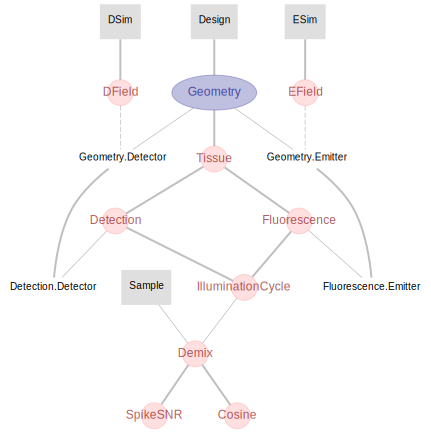

In [3]:
dj.Diagram(schema)

In [4]:
IlluminationCycle()

design design number,nframes number of illumination frames,illumination frames x emitters
1,521,=BLOB=
3,182,=BLOB=


# Queries

In [ ]:
r = {'design': 3, 'sample': 3}

In [ ]:
mix_norm, demix_norm, bias_norm, t_norm, cosines, snr = (
    Demix * Cosine * SpikeSNR & r).fetch1(
    'mix_norm', 'demix_norm', 'bias_norm', 'trans_bias_norm', 'cosines', 'snr')

In [ ]:
probs = np.stack((Detection.Detector & key).fetch('detect_probabilities'))
xyz = np.vstack((Tissue & key).fetch('cell_xyz'))
photons= np.stack((Fluorescence.Emitter & key).fetch('reemitted_photons'))

In [ ]:
npoints = mix_norm.size

In [ ]:
selection = np.r_[:probs.shape[1]] < npoints
np.random.seed(0)
np.random.shuffle(selection)

In [ ]:
probs = probs[:, selection]
xyz = xyz[selection]
photons = photons[:, selection]

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw=dict(projection='3d'))
ax.scatter(probs.sum(axis=0), photons.sum(axis=0), snr, s=1)
ax.set_xlim([0, 0.02])
ax.set_ylim([0, 2e11])

In [ ]:
plt.hist(np.log10(probs.sum(axis=0)))

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw=dict(projection='3d'))
c=probs[700]
ix = c > 1e-3
ax.scatter(xyz[ix,0], xyz[ix,1], xyz[ix,2], s=1)
ix = np.logical_and(c > 1e-4, np.logical_not(ix))
ax.scatter(xyz[ix,0], xyz[ix,1], xyz[ix,2], s=1, alpha=0.1)
ax.set_xlim([-600, 600])
ax.set_ylim([-600, 600])
ax.set_zlim([0, 1000])

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1, 1, figsize=(5, 5), subplot_kw=dict(projection='3d'))
c = probs.sum(axis=0)
ix = c > 0.03
ax.scatter(xyz[ix,0], xyz[ix,1], xyz[ix,2], s=1, alpha=0.1)
ax.set_xlim([-600, 600])
ax.set_ylim([-600, 600])
ax.set_zlim([0, 1000])

In [ ]:
cxyz = np.stack((Geometry.Emitter & 'design=3').fetch('e_center_x', 'e_center_y', 'e_center_z')).T

In [ ]:
nxyz = np.stack((Geometry.Emitter & 'design=3').fetch('e_norm_x', 'e_norm_y', 'e_norm_z')).T

In [ ]:
cxyz = cxyz[::9, :]
nxyz = nxyz[::9, :]

In [ ]:
%matplotlib inline
plt.plot(np.cos(cxyz[:8,2]*9/40*np.pi), np.sin(cxyz[:8,2]*np.pi*9/40))

In [ ]:
cxyz[:,2]

In [ ]:
xyz.shape

In [ ]:
plt.hist(np.log10(photons.sum(axis=1)*0.0001), 100);

In [ ]:
photons.sum(axis=0) * 0.04

In [ ]:
Detection.populate(reserve_jobs=True)

In [ ]:
Fluorescence.Emitter.fetch('photons_per_joule').mean()*0.05